In [ ]:
# Import dependencies

import pandas as pd
import numpy as np

from gym import Env
from gym.spaces import Discrete, Box, Dict, Tuple, MultiBinary, MultiDiscrete
from numpy.ma.core import shape

import numpy as np
import random
import os

from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy

In [ ]:
# Access data
df = pd.read_csv('/content/drive/MyDrive/Townsend/Eve/V0.03 Townsend Data - Sheet1.csv')

In [ ]:
# Print data
df.head()

,Date,Open,High,Low,Close,Previous Close,Change,Sentiment
0,########,3665.44,3707.71,3636.87,3674.84,3666.77,0.220085,-2.63
1,########,3728.18,3728.18,3639.77,3666.77,3789.99,-3.251196,-2.60
2,########,3764.05,3837.56,3722.30,3789.99,3735.48,1.459250,-2.58
3,########,3763.52,3778.18,3705.68,3735.48,3749.63,-0.377371,-2.60
4,########,3838.15,3838.15,3734.30,3749.63,3900.86,-3.876837,-2.61


In [ ]:
# Set variables
x = df['Sentiment'].values
y = df['Change'].values

In [ ]:
# Create The Environment for model to train in

class SentimentEnv(Env):
  def __init__(self):

    # Checks a given random day besides starting 50, and if change was positive
    # Variable self.Change gets set to 1, else -1
    self.random_day = random.randint(0, 8508)
    if y[self.random_day] > 0:
      self.change = 1
    else:
      self.change = -1

    # Gets past 5 previous day's sentiments
    self.prev_days = []
    for P in range(self.random_day+1, self.random_day+6):
      self.prev_days.append(x[P])


    # Algorithm either predicts 1, or 0: 1 meaning positive change 0 meaning 
    # negative, all 0's get set to -1
    self.action_space = Discrete(2)

    # algorithm views the 5 previous day's sentiments
    self.observation_space = Box(low=-100, high=100, shape=(5,))

    # Set state to previous_closes
    self.state = self.prev_days
    
  def step(self, action):

    # Checking action as 1,0 and correlating to accurate prediction
    if action == 1:
      predict = 1
    else:
      predict = -1

    # If prediction is the same as actual rewarded accordingly
    if predict == self.change:
      reward = 1
    else:
      reward = -1

    done = True
    
    info = {}

    # Episode is done
    return self.state, reward, done, info

  def render(self):
    pass

  def reset(self):

    # Resets all parameters
    self.random_day = random.randint(0, 8508)
    if y[self.random_day] > 0:
      self.change = 1
    else:
      self.change = -1

    self.prev_days = []
    for P in range(self.random_day+1, self.random_day+6):
      self.prev_days.append(x[P])

    self.action_space = Discrete(2)
    self.observation_space = Box(low=-100, high=100, shape=(5,))
    self.state = self.prev_days

    return self.state
    

In [ ]:
# Algorithm is picking randomly either it will close up or down
# a score of 1 is representative of being correct and 0 incorrect
env = SentimentEnv()
episodes = 5

for episode in range(1, episodes+1):
  state = env.reset()
  done = False
  score = 0

  while not done:
    env.render()
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    score += reward
  print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:-1
Episode:2 Score:1
Episode:3 Score:-1
Episode:4 Score:-1
Episode:5 Score:-1


In [ ]:
# Creating save file path and save model path along with creating a PPO model

log_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Logs')
model_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Models', '5_days','Eve_Model_10000_Iterations5days')
model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
# Start training and save
model.learn(total_timesteps=10000)
# model.save(model_path)

Logging to drive/MyDrive/Townsend/Eve/Training/Logs/PPO_33
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0        |
| time/              |          |
|    fps             | 1336     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1           |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 956         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.014706871 |
|    clip_fraction        | 0.0354      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.685      |
|    explaine

In [ ]:
# training and saving another 10000 episodes

model_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Models', '5_days', 'Eve_Model_20000_Iterations5days')
model.learn(total_timesteps=10000)
# model.save(model_path)

Logging to drive/MyDrive/Townsend/Eve/Training/Logs/PPO_26
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.06     |
| time/              |          |
|    fps             | 1362     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 1           |
|    ep_rew_mean          | 0.12        |
| time/                   |             |
|    fps                  | 1036        |
|    iterations           | 2           |
|    time_elapsed         | 3           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.004265777 |
|    clip_fraction        | 0.0306      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.436      |
|    explaine

In [ ]:
# training and saving another 10000 episodes

model_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Models', '5_days','Eve_Model_30000_Iterations5days')
model.learn(total_timesteps=10000)
# model.save(model_path)

Logging to drive/MyDrive/Townsend/Eve/Training/Logs/PPO_31
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0        |
| time/              |          |
|    fps             | 1302     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1          |
|    ep_rew_mean          | 0.24       |
| time/                   |            |
|    fps                  | 995        |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.01657091 |
|    clip_fraction        | 0.0196     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.689     |
|    explained_variance   |

In [ ]:
# training and saving another 10000 episodes

model_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Models', '5_days','Eve_Model_40000_Iterations5days')
model.learn(total_timesteps=10000)
# model.save(model_path)

Logging to drive/MyDrive/Townsend/Eve/Training/Logs/PPO_28
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.18     |
| time/              |          |
|    fps             | 1306     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 1          |
|    ep_rew_mean          | -0.02      |
| time/                   |            |
|    fps                  | 1014       |
|    iterations           | 2          |
|    time_elapsed         | 4          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00091858 |
|    clip_fraction        | 0.0117     |
|    clip_range           | 0.2        |
|    entropy_loss         | -0.176     |
|    explained_variance   |

In [ ]:
# training and saving another 10000 episodes

model_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Models', '5_days','Eve_Model_50000_Iterations5days')
model.learn(total_timesteps=10000)
# model.save(model_path)

Logging to drive/MyDrive/Townsend/Eve/Training/Logs/PPO_32
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | 0.02     |
| time/              |          |
|    fps             | 1298     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 1            |
|    ep_rew_mean          | 0.08         |
| time/                   |              |
|    fps                  | 978          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0046420624 |
|    clip_fraction        | 0.0624       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.411       |

In [ ]:
# training and saving another 10000 episodes

model_path = os.path.join('drive', 'MyDrive', 'Townsend', 'Eve', 'Training', 'Models', '5_days', 'Eve_Model_150000_Iterations5days')
model.learn(total_timesteps=100000)
# model.save(model_path)

Logging to drive/MyDrive/Townsend/Eve/Training/Logs/PPO_30
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1        |
|    ep_rew_mean     | -0.02    |
| time/              |          |
|    fps             | 1339     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 1             |
|    ep_rew_mean          | 0.16          |
| time/                   |               |
|    fps                  | 977           |
|    iterations           | 2             |
|    time_elapsed         | 4             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00014851562 |
|    clip_fraction        | 0.00317       |
|    clip_range           | 0.2           |
|    entropy_loss         | -

In [ ]:
# Testing latest 100 days // Can change by changing initial for loop range
# Max is 11161

day_result = 0
model_result = 0

days = []
correct = []

for i in range(0, 100):
  days.append(i)
  if y[i] > 0:
    end_result = 1
  else:
    end_result = -1

  day_result = end_result
  prev_days = []
  for P in range(i+1, i+6):
    prev_days.append(x[P])

  action, _ = model.predict((prev_days, ))
  print(action)
  if action == 1:
    model_result = 1
    if model_result == day_result:
      print("winner")
      print(prev_days)
    else:
      print("loser")
      print(prev_days)
  else:
    model_result = -1
    if model_result == day_result:
      print("winner")
      print(prev_days)
    else:
      print("loser")
      print(prev_days)

  if model_result == day_result:
    correct.append(1)
  else:
    correct.append(0)
  

[1]
winner
[-2.6, -2.58, -2.6, -2.61, -2.65]
[1]
loser
[-2.58, -2.6, -2.61, -2.65, -2.73]
[1]
winner
[-2.6, -2.61, -2.65, -2.73, -2.82]
[1]
loser
[-2.61, -2.65, -2.73, -2.82, -2.9]
[1]
loser
[-2.65, -2.73, -2.82, -2.9, -2.98]
[1]
loser
[-2.73, -2.82, -2.9, -2.98, -3.06]
[1]
loser
[-2.82, -2.9, -2.98, -3.06, -3.12]
[1]
loser
[-2.9, -2.98, -3.06, -3.12, -3.19]
[0]
loser
[-2.98, -3.06, -3.12, -3.19, -3.23]
[1]
winner
[-3.06, -3.12, -3.19, -3.23, -3.27]
[1]
loser
[-3.12, -3.19, -3.23, -3.27, -3.3]
[1]
winner
[-3.19, -3.23, -3.27, -3.3, -3.31]
[1]
loser
[-3.23, -3.27, -3.3, -3.31, -3.3]
[0]
winner
[-3.27, -3.3, -3.31, -3.3, -3.27]
[1]
winner
[-3.3, -3.31, -3.3, -3.27, -3.23]
[0]
loser
[-3.31, -3.3, -3.27, -3.23, -3.18]
[1]
winner
[-3.3, -3.27, -3.23, -3.18, -3.12]
[1]
loser
[-3.27, -3.23, -3.18, -3.12, -3.04]
[1]
winner
[-3.23, -3.18, -3.12, -3.04, -2.94]
[1]
winner
[-3.18, -3.12, -3.04, -2.94, -2.82]
[1]
loser
[-3.12, -3.04, -2.94, -2.82, -2.67]
[1]
loser
[-3.04, -2.94, -2.82, -2.67, -2.49

Text(0.5, 1.0, 'Day Vs. Correct')

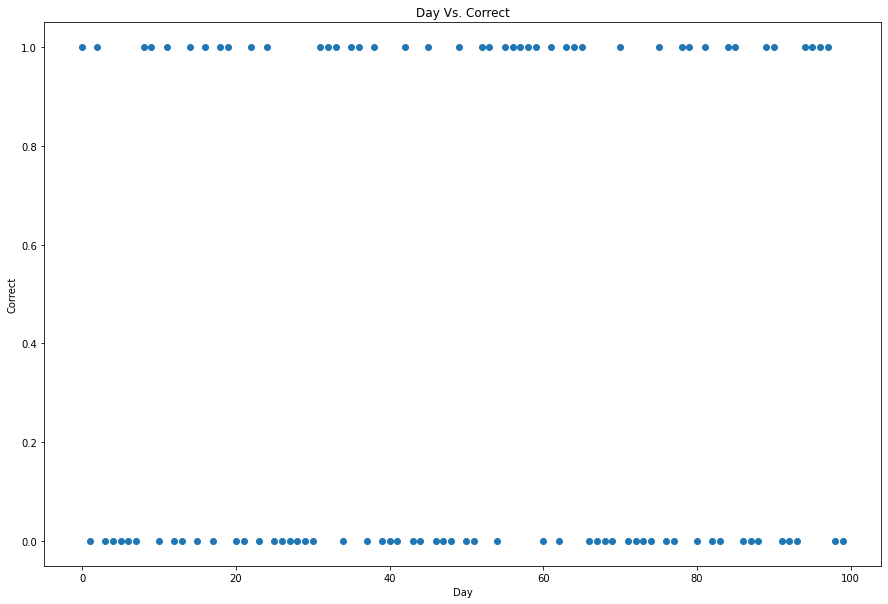

In [ ]:
# Plotting results for latest 100 days, 1 is correct, 0 is wrong
# Day 0 is June 20, 2022

import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(days, correct)
plt.xlabel('Day')
plt.ylabel('Correct')
plt.title('Day Vs. Correct')